In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/butter_rgb.csv')

# Center and Normalize data
df_mean = df.mean()
df_std = df.std()
df = (df - df_mean) / df_std

df.head()


,R,G,B
0,-0.513511,-1.168924,-1.346793
1,0.044870,-1.066443,-0.271802
2,0.284176,-1.373886,-0.662708
3,-0.992124,0.163329,1.878181
4,0.683020,1.085658,0.053953


In [3]:
print(df_mean)
print(df_std)

R    150.43750
G    216.40625
B    187.34375
dtype: float64
R    12.536238
G     9.757906
B    30.697914
dtype: float64


[[-0.60146571  0.33104085  0.72708387]
 [ 0.53413964  0.8434146   0.05785026]]


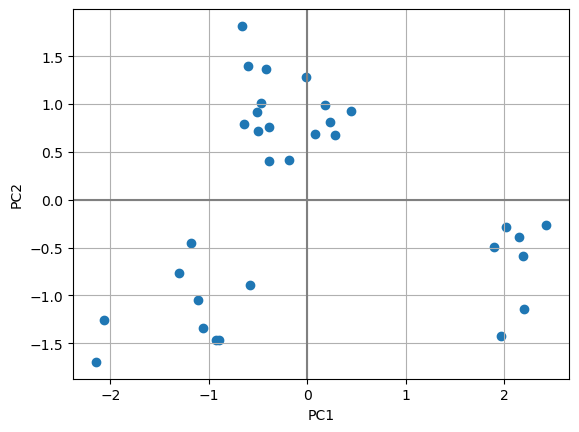

In [4]:
# Use PCA for dimensionality reduction and plot the first two components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(df)

# pca coefs
print(pca.components_)

X = pca.transform(df)

plt.scatter(X[:, 0], X[:, 1])

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()


/home/quakumei/.conda/envs/py39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


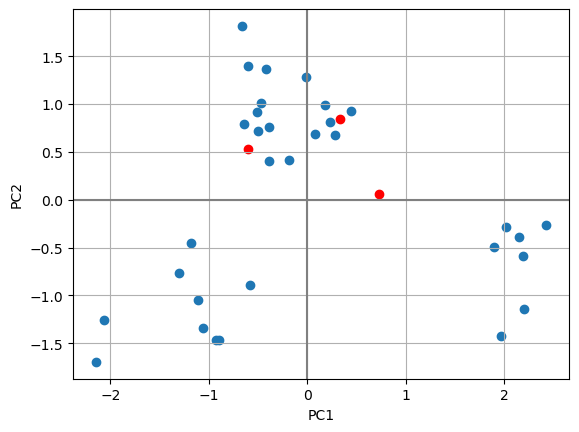

In [5]:
# Predict pca for new rgb values
new_rgb = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
new_rgb = pca.transform(new_rgb)

# Plot new rgb values
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(new_rgb[:, 0], new_rgb[:, 1], color='red')

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# # Write index labels
# for i, txt in enumerate(df.index):
#     plt.annotate(txt, (X[i, 0], X[i, 1]))
    

# Grid
plt.grid()
plt.show()


In [6]:
new_rgb

array([[-0.60146571,  0.53413964],
       [ 0.33104085,  0.8434146 ],
       [ 0.72708387,  0.05785026]])

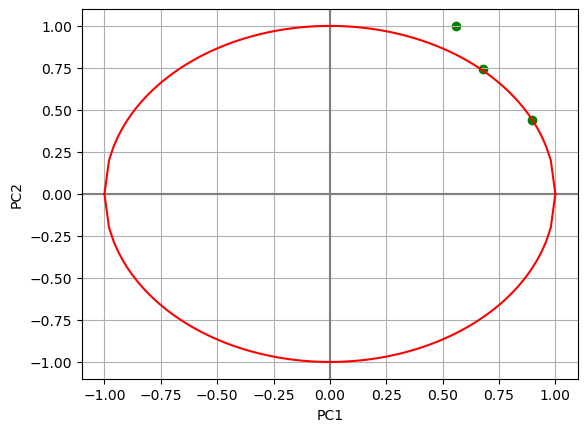

In [7]:
import numpy as np
rofl = np.cos(new_rgb) * np.cos(new_rgb)

#plot rofl
plt.scatter(rofl[:, 0], rofl[:, 1], color='green')

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Add graph of cos^2 + sin^2 = 1
x = np.linspace(-1, 1, 100)
y = np.sqrt(1 - x**2)
plt.plot(x, y, color='red')
plt.plot(x, -y, color='red')



# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()
plt.show()


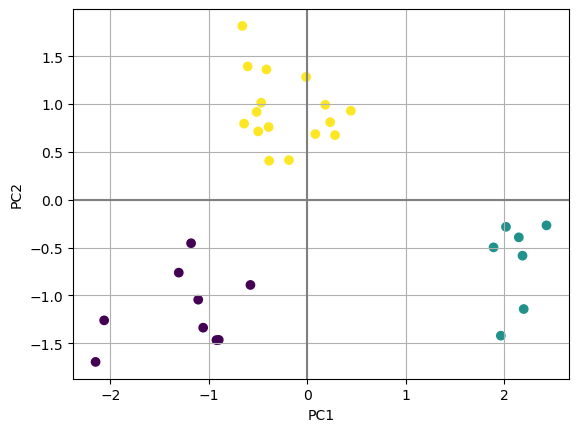

In [8]:
# Cluster data using Agglomerative Hierarchical Clustering (AHC)
from sklearn.cluster import AgglomerativeClustering

# Use Entropy truncation
ahc = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ahc.fit(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=ahc.labels_)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()



In [9]:
# Write which colors match which clusters
for i in range(4):
    print('Cluster', i, 'contains', df[ahc.labels_ == i].index.values)


Cluster 0 contains [ 0  1  2  9 10 16 21 25 28]
Cluster 1 contains [ 3 11 12 13 14 24 31]
Cluster 2 contains [ 4  5  6  7  8 15 17 18 19 20 22 23 26 27 29 30]
Cluster 3 contains []


2 = 3

In [10]:
# Append cluster labels to dataframe
df['cluster'] = ahc.labels_
df.head()

,R,G,B,cluster
0,-0.513511,-1.168924,-1.346793,0
1,0.044870,-1.066443,-0.271802,0
2,0.284176,-1.373886,-0.662708,0
3,-0.992124,0.163329,1.878181,1
4,0.683020,1.085658,0.053953,2


In [11]:
# Replace cluster label 3 with 2
df['cluster'] = df['cluster'].replace(3, 2)

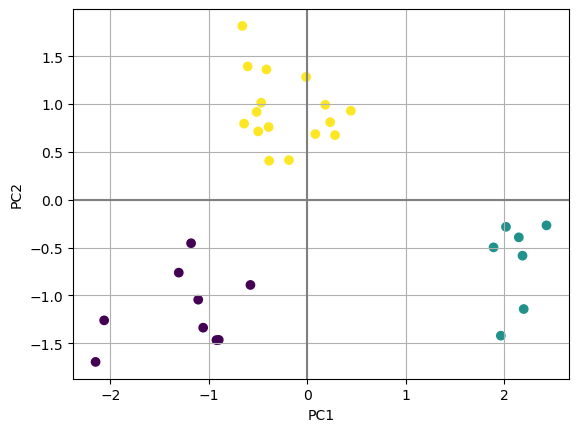

In [12]:
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'])

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()


In [13]:
label_table = {
    0: 'фальсификат',
    1: 'кокосовое',
    2: 'сливочное',
}

# Replace cluster labels with names
df['cluster'] = df['cluster'].replace(label_table)

In [14]:
df.head()

,R,G,B,cluster
0,-0.513511,-1.168924,-1.346793,фальсификат
1,0.044870,-1.066443,-0.271802,фальсификат
2,0.284176,-1.373886,-0.662708,фальсификат
3,-0.992124,0.163329,1.878181,кокосовое
4,0.683020,1.085658,0.053953,сливочное


In [15]:
# Write to csv
df.to_csv('../data/butter_rgb_with_labels.csv', index=False)

In [16]:
# Reverse replace
df['cluster'] = df['cluster'].replace({v: k for k, v in label_table.items()})
df.head()

,R,G,B,cluster
0,-0.513511,-1.168924,-1.346793,0
1,0.044870,-1.066443,-0.271802,0
2,0.284176,-1.373886,-0.662708,0
3,-0.992124,0.163329,1.878181,1
4,0.683020,1.085658,0.053953,2


In [17]:
# to csv
df.to_csv('../data/butter_rgb_with_labels_numbers.csv', index=False)

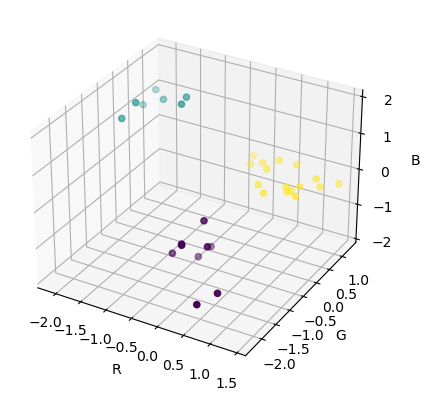

In [18]:
# Plot three-dimensional clusters according to rgb values
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['R'], df['G'], df['B'], c=df['cluster'])

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()


In [19]:
# Train KNN classifier on the RGB and cluster labels and compare performance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['R', 'G', 'B']], df['cluster'], test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict labels
y_pred = knn.predict(X_test)

# Calculate accuracy
print("KNN on RGB accuracy:", accuracy_score(y_test, y_pred))





KNN on RGB accuracy: 1.0


In [20]:
import numpy as np

[[-0.60146571  0.33104085  0.72708387]
 [ 0.53413964  0.8434146   0.05785026]]
KNN on PCA accuracy: 1.0


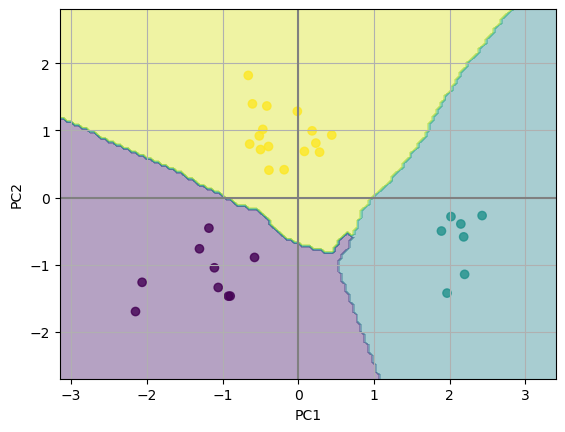

In [21]:
# Train KNN classifier on the PCA and cluster labels and compare performance
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['cluster'], test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# pca coefs
print(pca.components_)

# Predict labels
y_pred = knn.predict(X_test)

# Calculate accuracy
print("KNN on PCA accuracy:", accuracy_score(y_test, y_pred))


# Plot the division of space into clusters for KNN on PCA

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)


# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()




In [22]:
# Train KNN classifier on the PCA values, but make the distribution of groups equal
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['cluster'], test_size=0.2, random_state=42, stratify=df['cluster'])

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict labels
y_pred = knn.predict(X_test)

# Calculate accuracy
print("KNN on PCA with equal distribution of groups accuracy:", accuracy_score(y_test, y_pred))


KNN on PCA with equal distribution of groups accuracy: 1.0


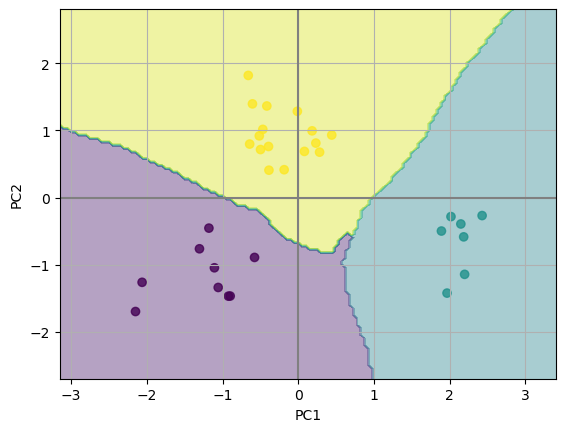

In [23]:
# Plot the division of space into clusters for KNN on PCA with equal distribution of groups

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')

plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()


In [24]:
# Train KNN classifier on the PCA values, but make the distribution of groups equal and n_neighbours=1
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['cluster'], test_size=0.2, random_state=42, stratify=df['cluster'])

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict labels
y_pred = knn.predict(X_test)

# Calculate accuracy
print("KNN on PCA with equal distribution of groups accuracy:", accuracy_score(y_test, y_pred))

KNN on PCA with equal distribution of groups accuracy: 1.0


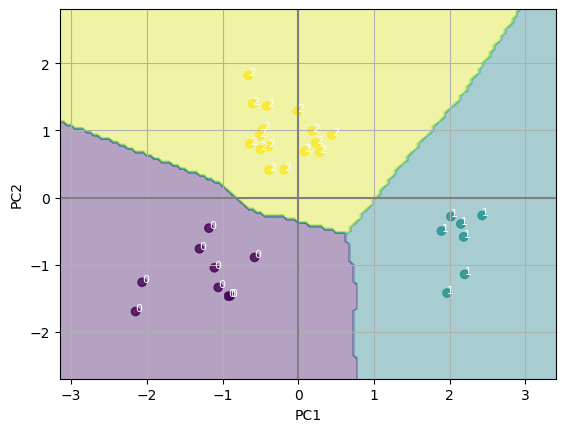

In [25]:
# Plot the division of space into clusters for KNN on PCA with equal distribution of groups

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Say which points belong to which cluster
for i in range(0, len(df)):
    plt.text(X[i, 0], X[i, 1], df['cluster'][i], fontsize=8, color='white')
    

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()


Tree on PCA accuracy: 1.0


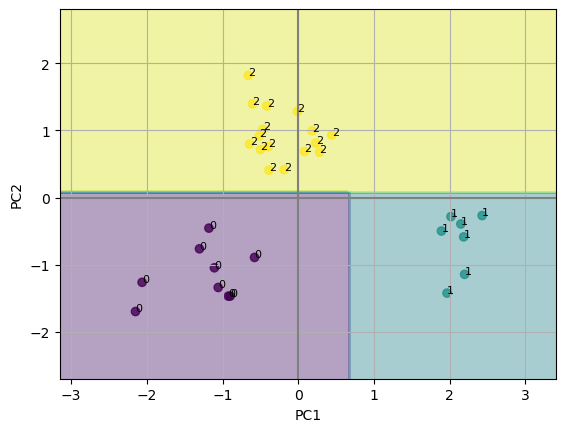

In [26]:
# Train tree classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict labels
y_pred = tree.predict(X_test)

# Calculate accuracy
print("Tree on PCA accuracy:", accuracy_score(y_test, y_pred))

# Plot the division of space into clusters for tree on PCA

# Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict labels for each point in the meshgrid
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)



# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')


# Plot additional PCA dots
# values = pd.DataFrame([[255,0,0],[0,255,0],[0,0,255]])
# values.columns = ['R', 'G', 'B']
# active = pca.transform((values - df_mean)/df_std)
# print(active)
# plt.scatter(active[:, 0], active[:, 1], c='red', alpha=0.8)

# Plot where would average colors of groups fall
# values = pd.DataFrame([[255,0,0],[0,255,0],[0,0,255]])

# Say which points belong to which cluster
for i in range(0, len(df)):
    plt.text(X[i, 0], X[i, 1], df['cluster'][i], fontsize=8)
    


# Grid
plt.grid()
plt.show()


In [27]:
!pip3 install graphviz

In [28]:
df['cluster'].value_counts()

2    16
0     9
1     7
Name: cluster, dtype: int64

In [29]:
# 2 - 

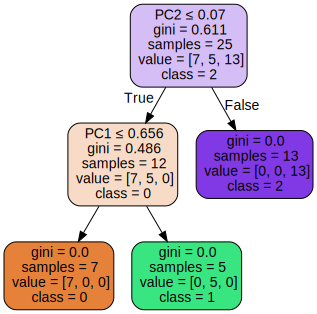

In [30]:
# Print the tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, out_file=None, feature_names=['PC1', 'PC2'], class_names=['0','1','2'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [31]:
pca.components_

array([[-0.60146571,  0.33104085,  0.72708387],
       [ 0.53413964,  0.8434146 ,  0.05785026]])

In [32]:
# Print average color of each cluster
for i in range(3):
    print('Cluster', i)
    r = df[df['cluster'] == i]['R'].mean()*df_std['R']+df_mean['R']
    g =  df[df['cluster'] == i]['G'].mean()*df_std['G']+df_mean['G']
    b= df[df['cluster'] == i]['B'].mean()*df_std['B']+df_mean['B']

    print('R:', r)
    print('G:', g)
    print('B:', b)

    # SHOW COLOR HEX-lIKE
    print('#%02x%02x%02x' % (round(r), round(g), round(b)))

Cluster 0
R: 151.11111111111111
G: 203.44444444444446
B: 154.44444444444446
#97cb9a
Cluster 1
R: 130.57142857142856
G: 217.57142857142858
B: 234.85714285714286
#83daeb
Cluster 2
R: 158.75
G: 223.1875
B: 185.0625
#9fdfb9


In [33]:
# Get PCA components
pca.components_


array([[-0.60146571,  0.33104085,  0.72708387],
       [ 0.53413964,  0.8434146 ,  0.05785026]])

In [34]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 2 artists>

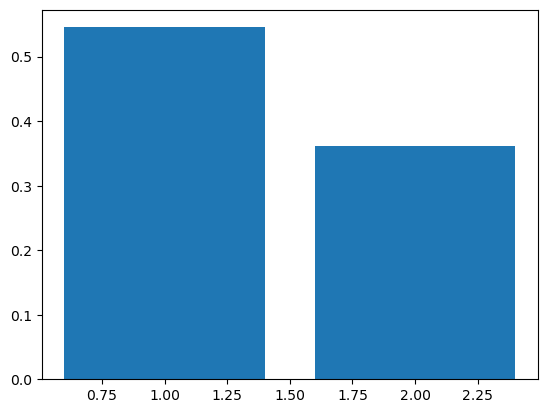

In [35]:
# Plot squared cosines of active components
plt.bar(np.arange(1, 3), pca.explained_variance_ratio_)

In [36]:
# Check ortoganality
np.dot(pca.components_[0], pca.components_[1])

5.551115123125783e-17

points
difference in averages R   -147.625198
G   -213.593948
B   -184.531448
dtype: float64
original dataset std:  R    12.536238
G     9.757906
B    30.697914
dtype: float64


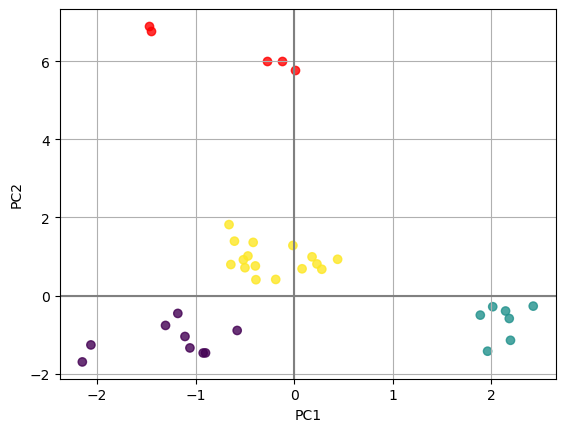

In [37]:
points = pd.DataFrame([[232, 255, 235],
[209, 253, 254],
[229, 255, 230],
[214, 253, 252],
[212, 254, 253],])
points.columns = ['R', 'G', 'B']

# normalize with df_mean df_std
points = (points - df_mean) / df_std
points = pca.transform(points)
print('points')
print("difference in averages", points.mean() - df_mean)
print("original dataset std: ", df_std)

# Plot pca points
plt.scatter(points[:, 0], points[:, 1], c='red', alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

plt.show()


points
difference in averages:
 R    50.76250
G    35.59375
B    49.85625
dtype: float64
original dataset std:
 R    12.536238
G     9.757906
B    30.697914
dtype: float64


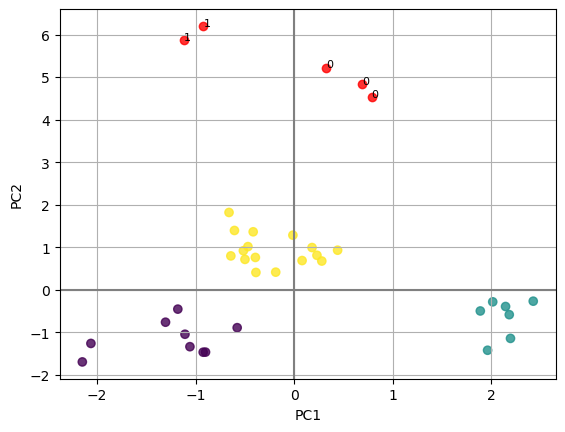

In [38]:
points = pd.DataFrame([[216, 255,226],
[188,249,250],
[211, 254, 209],
[200,251,252],
[191, 251, 249],
])

# compare average of points
# with average of df

points.columns = ['R', 'G', 'B']
labels = pd.DataFrame([1, 0, 1, 0, 0])
print('points')
print("difference in averages:\n", points.mean() - df_mean)
print("original dataset std:\n", df_std, sep=None)

# normalize with df_mean df_std
points = (points - df_mean) / df_std

points = pca.transform(points)
points

# Plot pca points
plt.scatter(points[:, 0], points[:, 1], c='red', alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

# Write labels
for i in range(0, len(labels)):
    plt.text(points[i, 0], points[i, 1], labels[0][i], fontsize=8)



plt.show()


points
difference in averages:
 R    59.229167
G    27.260417
B    49.656250
dtype: float64
original dataset std:
 R    12.536238
G     9.757906
B    30.697914
dtype: float64


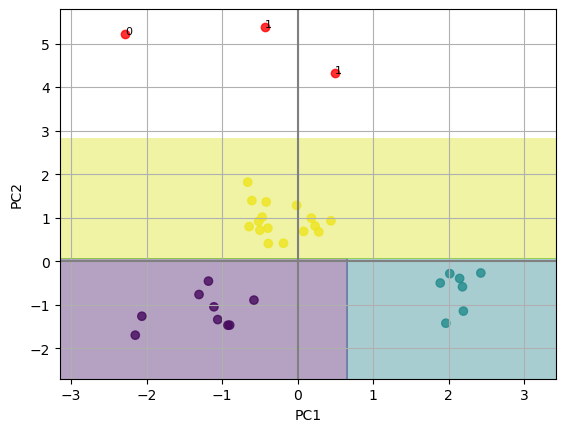

In [42]:

# index2.jpg
points = pd.DataFrame([
    [224,240,206],
    [212,247,250],
    [193,244,255],

    [199,236,215],
    [201,236,215],
    [140,237,251],
    [157,246,252],
])

# compare average of points
# with average of df

points.columns = ['R', 'G', 'B']
labels = pd.DataFrame([0, 1, 1, 0, 0, 1, 1])

print('points')
print("difference in averages:\n", points.mean() - df_mean)
print("original dataset std:\n", df_std, sep=None)

# normalize with df_mean df_std
points = (points - df_mean) / df_std

points = pca.transform(points)
points

# Plot pca points
plt.scatter(points[:, 0], points[:, 1], c='red', alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

# Write labels
for i in range(0, len(labels)):
    plt.text(points[i, 0], points[i, 1], labels[0][i], fontsize=8)

# Plot PCA  countours of each class with DecisionTree
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)



plt.show()


points
difference in averages:
 R   -16.43750
G    -3.40625
B    28.65625
dtype: float64
original dataset std:
 R    12.536238
G     9.757906
B    30.697914
dtype: float64
[1]


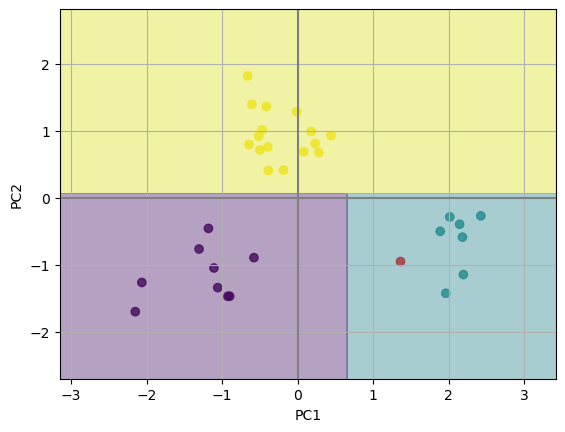

In [39]:
#134 213 216

points = pd.DataFrame([[134, 213, 216], ])

# compare average of points
# with average of df

points.columns = ['R', 'G', 'B']
print('points')
print("difference in averages:\n", points.mean() - df_mean)
print("original dataset std:\n", df_std, sep=None)

# normalize with df_mean df_std
points = (points - df_mean) / df_std

points = pca.transform(points)
points

# Plot pca points
plt.scatter(points[:, 0], points[:, 1], c='red', alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=df['cluster'], alpha=0.8)

# Draw axis
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

# Label axis
plt.xlabel('PC1')
plt.ylabel('PC2')

# Grid
plt.grid()

# Decide class with DecisionTree
print(tree.predict(points))

# Plot PCA  countours of each class with DecisionTree
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)







plt.show()


In [40]:
df.head()

,R,G,B,cluster
0,-0.513511,-1.168924,-1.346793,0
1,0.044870,-1.066443,-0.271802,0
2,0.284176,-1.373886,-0.662708,0
3,-0.992124,0.163329,1.878181,1
4,0.683020,1.085658,0.053953,2
